In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align

### Load trajectories

##### IFNL4/A3

In [2]:
a3_rep1 = mda.Universe('ifnl4_a3.tpr', 'ifnl4_a3_rep1.xtc')
a3_rep2 = mda.Universe('ifnl4_a3.tpr', 'ifnl4_a3_rep2.xtc')
a3_rep3 = mda.Universe('ifnl4_a3.tpr', 'ifnl4_a3_rep3.xtc')
ifnl4_a3_combined = mda.Universe('ifnl4_a3.tpr', ['ifnl4_a3_rep1.xtc', 'ifnl4_a3_rep2.xtc', 'ifnl4_a3_rep3.xtc'])

##### IFNL4/WT

In [3]:
wt_rep1 = mda.Universe('ifnl4_wt.tpr', 'ifnl4_wt_rep1.xtc')
wt_rep2 = mda.Universe('ifnl4_wt.tpr', 'ifnl4_wt_rep2.xtc')
wt_rep3 = mda.Universe('ifnl4_wt.tpr', 'ifnl4_wt_rep3.xtc')
ifnl4_wt_combined = mda.Universe('ifnl4_wt.tpr', ['ifnl4_wt_rep1.xtc', 'ifnl4_wt_rep2.xtc', 'ifnl4_wt_rep3.xtc'])

##### IFNL3

In [7]:
ifnl3_rep1 = mda.Universe('ifnl3.tpr', 'ifnl3_rep1.xtc')
ifnl3_rep2 = mda.Universe('ifnl3.tpr', 'ifnl3_rep2.xtc')
ifnl3_rep3 = mda.Universe('ifnl3.tpr', 'ifnl3_rep3.xtc')
ifnl3_combined = mda.Universe('ifnl3.tpr', ['ifnl3_rep1.xtc', 'ifnl3_rep2.xtc', 'ifnl3_rep3.xtc'])

### RMSF

##### IFNL4/A3

In [4]:
ref_a3 = ifnl4_a3_combined.select_atoms('protein')
aligner = align.AlignTraj(ifnl4_a3_combined, ref_a3,
                          select='protein and name CA',
                          in_memory=True).run()
c_alphas_ifnl4 = ifnl4_a3_combined.select_atoms('protein and name CA')
rmsf_a3 = rms.RMSF(c_alphas_ifnl4).run()

#####  INFL4/WT

In [5]:
ref_wt = ifnl4_wt_combined.select_atoms('protein')
aligner = align.AlignTraj(ifnl4_wt_combined, ref_wt,
                          select='protein and name CA',
                          in_memory=True).run()
c_alphas = ifnl4_wt_combined.select_atoms('protein and name CA')
rmsf_wt = rms.RMSF(c_alphas).run()

##### IFNL3

In [8]:
ref = ifnl3_combined.select_atoms('protein')
aligner = align.AlignTraj(ifnl3_combined, ref,
                          select='protein and name CA',
                          in_memory=True).run()
c_alphas_ifnl3 = ifnl3_combined.select_atoms('protein and name CA')
rmsf_ifnl3 = rms.RMSF(c_alphas_ifnl3).run()

#### Figures of RMSF

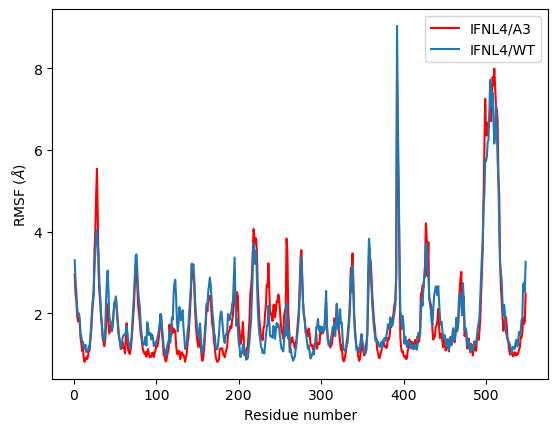

In [9]:
# Comparing the RMSF of IFNL4/A3 and IFNL4/WT for the entire complexes

plt.plot(c_alphas_ifnl4.resids, rmsf_a3.results.rmsf, label='IFNL4/A3', color='red')
plt.plot(c_alphas_ifnl4.resids, rmsf_wt.results.rmsf, label='IFNL4/WT')
plt.xlabel('Residue number')
plt.ylabel('RMSF ($\AA$)')
#plt.axvspan(122, 159, zorder=0, alpha=0.2, color='orange', label='LID')
#plt.axvspan(30, 59, zorder=0, alpha=0.2, color='green', label='NMP')
plt.legend()

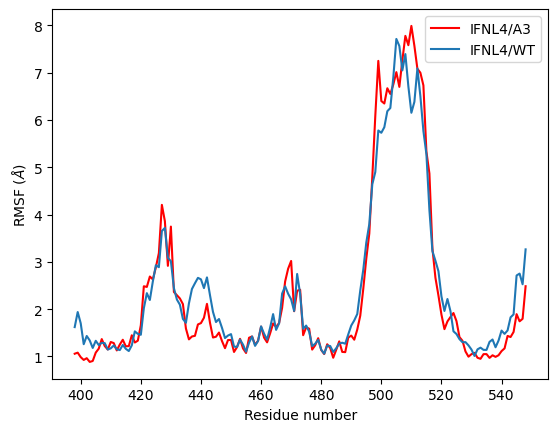

In [10]:
# Zooming in on the IFNL4 domain for WT and A3

plt.plot(c_alphas_ifnl4.resids[397:], rmsf_a3.results.rmsf[397:], label='IFNL4/A3', color='red')
plt.plot(c_alphas_ifnl4.resids[397:], rmsf_wt.results.rmsf[397:], label='IFNL4/WT')
plt.xlabel('Residue number')
plt.ylabel('RMSF ($\AA$)')
#plt.axvspan(122, 159, zorder=0, alpha=0.2, color='orange', label='LID')
#plt.axvspan(30, 59, zorder=0, alpha=0.2, color='green', label='NMP')
plt.legend()

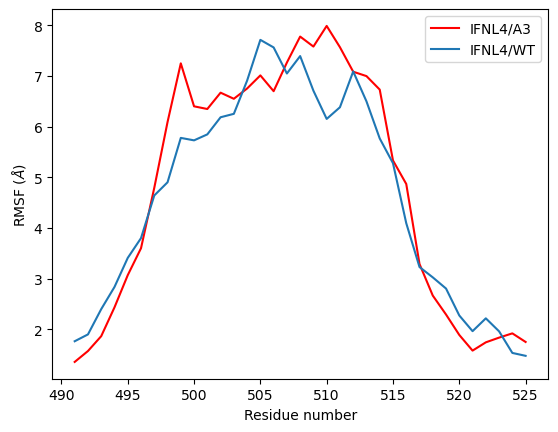

In [11]:
# Zooming further in on the flexible loop region of the IFNL4 domain for WT and A3

plt.plot(c_alphas_ifnl4.resids[490:525], rmsf_a3.results.rmsf[490:525], label='IFNL4/A3', color='red')
plt.plot(c_alphas_ifnl4.resids[490:525], rmsf_wt.results.rmsf[490:525], label='IFNL4/WT')
plt.xlabel('Residue number')
plt.ylabel('RMSF ($\AA$)')
#plt.axvspan(122, 159, zorder=0, alpha=0.2, color='orange', label='LID')
#plt.axvspan(30, 59, zorder=0, alpha=0.2, color='green', label='NMP')
plt.legend()

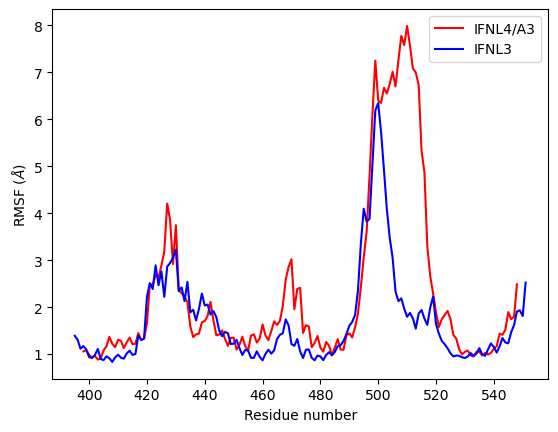

In [12]:
# Compare RMSF of IFNL4/A3 and IFNL3 for the IFNL domain
fig, ax = plt.subplots()

# IFNL of IFNL4/A3 is residues 397-548 and IFNL of IFNL3 is residues 394-551
ax.plot(c_alphas_ifnl4.resids[397:], rmsf_a3.results.rmsf[397:], label='IFNL4/A3', color='red')
ax.plot(c_alphas_ifnl3.resids[394:], rmsf_ifnl3.results.rmsf[394:], label='IFNL3', color='blue')

ax.set_xlabel('Residue number')
ax.set_ylabel('RMSF ($\AA$)')

ax.legend()

plt.show()

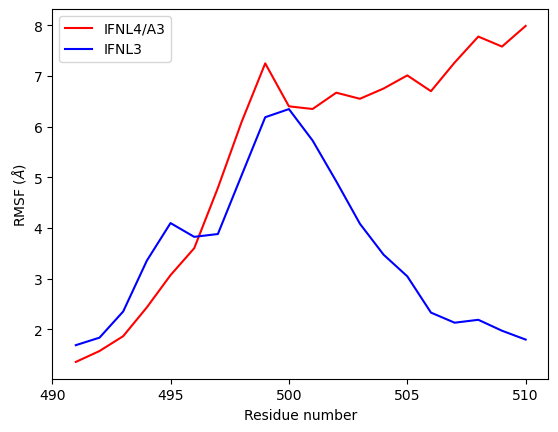

In [13]:
# Zooming in on the loop region of INFL domains

fig, ax = plt.subplots()

ax.plot(c_alphas_ifnl4.resids[490:510], rmsf_a3.results.rmsf[490:510], label='IFNL4/A3', color='red')
ax.plot(c_alphas_ifnl3.resids[490:510], rmsf_ifnl3.results.rmsf[490:510], label='IFNL3', color='blue')

ax.set_xlabel('Residue number')
ax.set_ylabel('RMSF ($\AA$)')
#ax.set_xlim(490, 510)
ax.legend()

# Set the x-axis tick locations as integers
plt.xticks(range(490, 511, 5))

plt.show()

### Ion analysis for IFNL4/A3

In [14]:
protein = ifnl4_a3_combined.select_atoms('protein')
ions = ifnl4_a3_combined.select_atoms('resname NA CL')  


In [15]:
# Define a distance threshold (in Ångströms)
distance_threshold = 1.

# Initialize a dictionary to hold counts of frames within distance for each residue
residue_contact_frequency = {residue.ix: 0 for residue in protein.residues}

# Pre-calculate center of mass for each residue
residue_positions = np.array([residue.atoms.center_of_mass() for residue in protein.residues])

# Loop over each frame in the trajectory
for ts in ifnl4_a3_combined.trajectory:
    # For each ion, calculate the distance to the representative point of each residue
    for ion in ions:
        distances = np.linalg.norm(ion.position - residue_positions, axis=1)
        for i, dist in enumerate(distances):
            if dist <= distance_threshold:
                residue_contact_frequency[protein.residues[i].ix] += 1

# Normalize by the number of frames to get a frequency
total_frames = len(ifnl4_a3_combined.trajectory)
for residue_ix in residue_contact_frequency:
    residue_contact_frequency[residue_ix] /= total_frames

In [16]:
# Find residues with the highest contact frequencies
most_visited_residues = sorted(residue_contact_frequency, key=residue_contact_frequency.get, reverse=True)

# Print out the top N residues
for residue_ix in most_visited_residues[:10]:  # Adjust N as needed
    print(f"Residue {protein.residues[residue_ix].resname} {protein.residues[residue_ix].resid} frequency: {residue_contact_frequency[residue_ix]:.4f}")


Residue ARG 510 frequency: 0.0003
Residue ARG 237 frequency: 0.0002
Residue GLN 507 frequency: 0.0002
Residue LYS 502 frequency: 0.0002
Residue ARG 514 frequency: 0.0002
Residue PRO 504 frequency: 0.0001
Residue LYS 512 frequency: 0.0001
Residue ARG 436 frequency: 0.0001
Residue ARG 501 frequency: 0.0001
Residue ALA 506 frequency: 0.0001


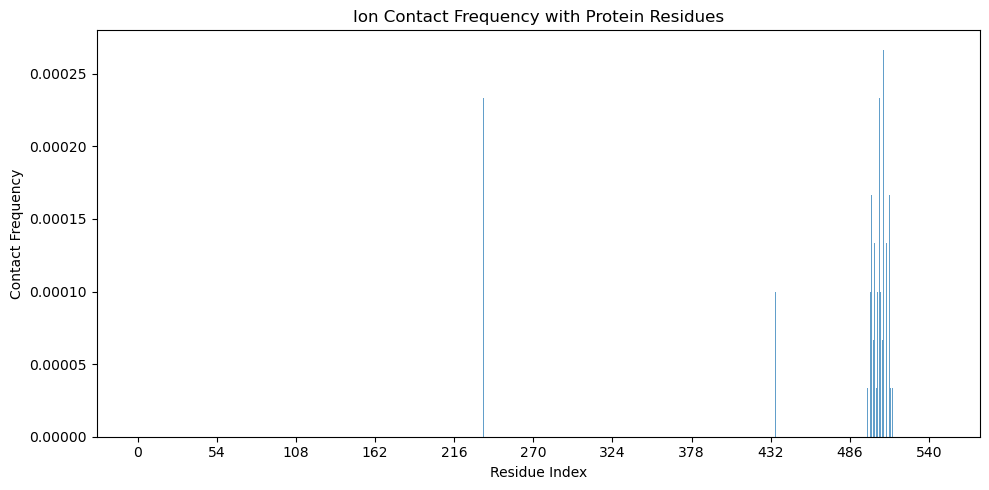

In [17]:
# Plotting the contact frequency of ions with protein residues

# Extract residues (or their indices) and frequencies directly
residue_indices = list(residue_contact_frequency.keys())
frequencies = [residue_contact_frequency[res_ix] for res_ix in residue_indices]

# Plotting
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
plt.bar(residue_indices, frequencies, alpha=0.7)
plt.xlabel('Residue Index')
plt.ylabel('Contact Frequency')
plt.title('Ion Contact Frequency with Protein Residues')

# Adjusting the x-axis ticks to show specific residue indices if there are too many to display clearly
plt.xticks(residue_indices[::max(int(len(residue_indices)/10), 1)])  # Adjust the slicing as needed for readability

plt.tight_layout()
plt.show()

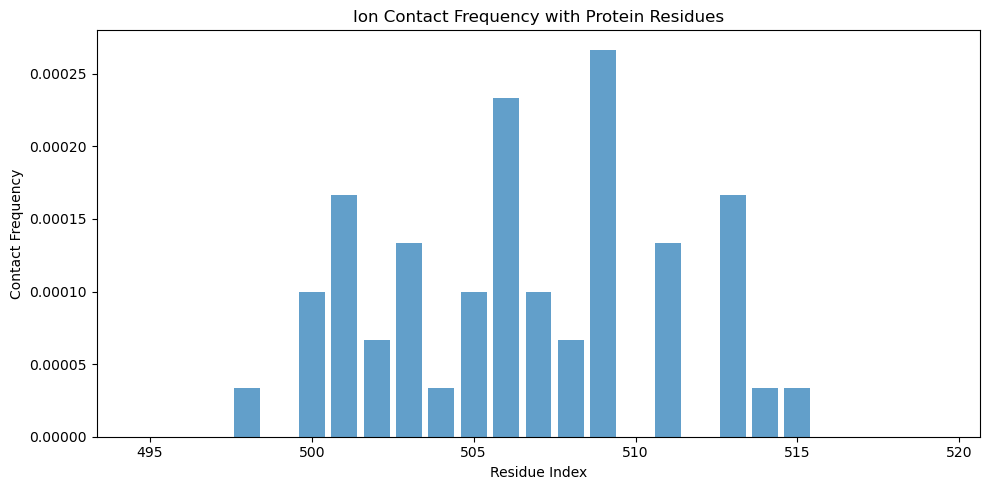

In [18]:
# Zooming in on the loop region of the IFNL4 domain
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
plt.bar(residue_indices[495:520], frequencies[495:520], alpha=0.7)
plt.xlabel('Residue Index')
plt.ylabel('Contact Frequency')
plt.title('Ion Contact Frequency with Protein Residues')

# Adjusting the x-axis ticks to show specific residue indices if there are too many to display clearly
#plt.xticks(residue_indices[::max(int(len(residue_indices)/10), 1)])  # Adjust the slicing as needed for readability

plt.tight_layout()
plt.show()

### Convergence 

##### IFNL4/a3

In [19]:
# Select the atoms you want to include in the RMSD calculation, usually the backbone atoms for proteins
ref1 = a3_rep1.select_atoms('backbone')  # Adjust your selection as needed
ref2 = a3_rep2.select_atoms('backbone')  # Adjust your selection as needed
ref3 = a3_rep3.select_atoms('backbone')  # Adjust your selection as needed

# You can also use a different frame as a reference
a3_rep1.trajectory[0]  # For using the first frame as the reference
a3_rep2.trajectory[0]  # For using the first frame as the reference
a3_rep3.trajectory[0]  # For using the first frame as the reference

rmsd_analysis1 = rms.RMSD(ref1, ref1, select='backbone')  # Adjust selection as needed
rmsd_analysis2 = rms.RMSD(ref2, ref2, select='backbone')  # Adjust selection as needed
rmsd_analysis3 = rms.RMSD(ref3, ref3, select='backbone')  # Adjust selection as needed

rmsd_analysis1.run()
rmsd_analysis2.run()
rmsd_analysis3.run()

/home/fabian/mambaforge/envs/ifnl4-analysis/lib/python3.11/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


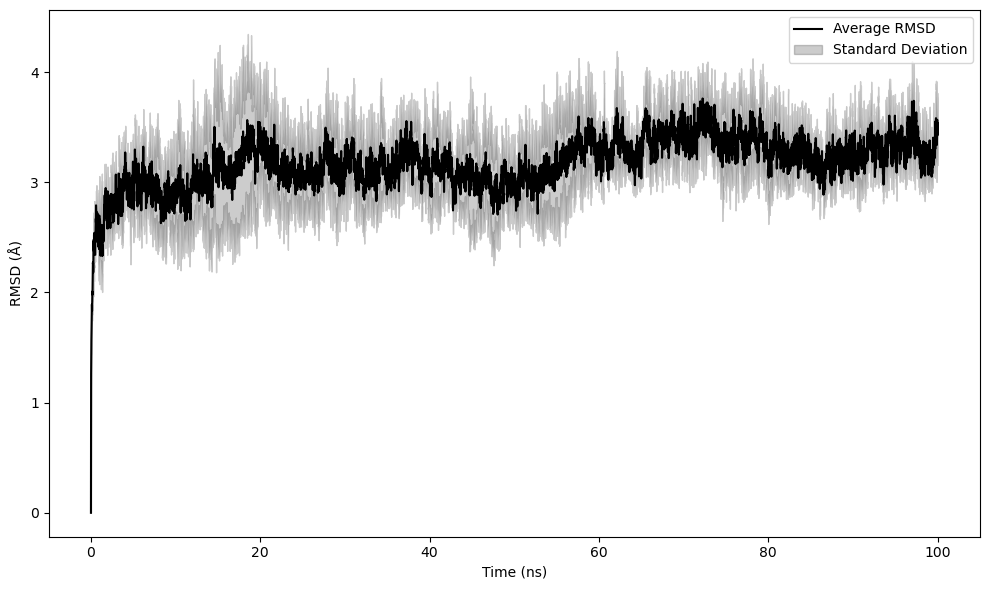

In [20]:
# Plot the RMSD values over time
rmsd_values1 = rmsd_analysis1.rmsd[:, 2]
rmsd_values2 = rmsd_analysis2.rmsd[:, 2]
rmsd_values3 = rmsd_analysis3.rmsd[:, 2]

time = rmsd_analysis1.rmsd[:, 1]/1000  # Assuming the time is stored in the third column
# Calculate the average RMSD
average_rmsd = (rmsd_values1 + rmsd_values2 + rmsd_values3) / 3

# Calculate the standard deviation
std_deviation = np.std([rmsd_values1, rmsd_values2, rmsd_values3], axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, average_rmsd, label='Average RMSD', color='black')
plt.fill_between(time, average_rmsd - std_deviation, average_rmsd + std_deviation, alpha=0.2, label='Standard Deviation', color='black')
plt.xlabel('Time (ns)')
plt.ylabel('RMSD (Å)')
plt.legend()
plt.tight_layout()
plt.show()

#### IFNL4/WT

In [21]:
# Select the atoms you want to include in the RMSD calculation, usually the backbone atoms for proteins
ref1 = wt_rep1.select_atoms('backbone')  # Adjust your selection as needed
ref2 = wt_rep2.select_atoms('backbone')  # Adjust your selection as needed
ref3 = wt_rep3.select_atoms('backbone')  # Adjust your selection as needed

# You can also use a different frame as a reference
wt_rep1.trajectory[0]  # For using the first frame as the reference
wt_rep2.trajectory[0]  # For using the first frame as the reference
wt_rep3.trajectory[0]  # For using the first frame as the reference

rmsd_analysis1 = rms.RMSD(ref1, ref1, select='backbone')  # Adjust selection as needed
rmsd_analysis2 = rms.RMSD(ref2, ref2, select='backbone')  # Adjust selection as needed
rmsd_analysis3 = rms.RMSD(ref3, ref3, select='backbone')  # Adjust selection as needed

rmsd_analysis1.run()
rmsd_analysis2.run()
rmsd_analysis3.run()

/home/fabian/mambaforge/envs/ifnl4-analysis/lib/python3.11/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


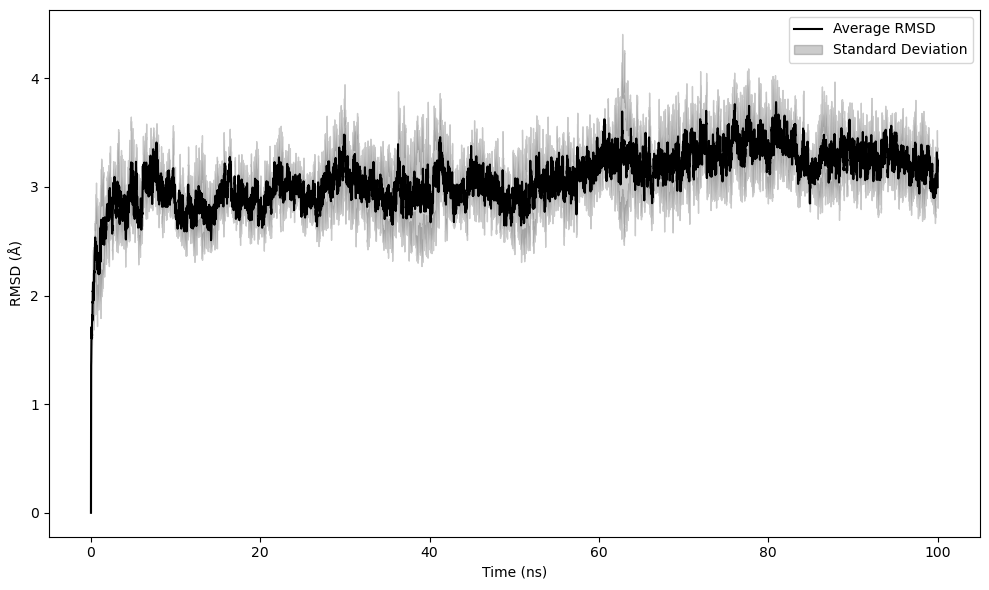

In [22]:
rmsd_values1 = rmsd_analysis1.rmsd[:, 2]
rmsd_values2 = rmsd_analysis2.rmsd[:, 2]
rmsd_values3 = rmsd_analysis3.rmsd[:, 2]

time = rmsd_analysis1.rmsd[:, 1]/1000  # Assuming the time is stored in the third column
# Calculate the average RMSD
average_rmsd = (rmsd_values1 + rmsd_values2 + rmsd_values3) / 3

# Calculate the standard deviation
std_deviation = np.std([rmsd_values1, rmsd_values2, rmsd_values3], axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, average_rmsd, label='Average RMSD', color='black')
plt.fill_between(time, average_rmsd - std_deviation, average_rmsd + std_deviation, alpha=0.2, label='Standard Deviation', color='black')
plt.xlabel('Time (ns)')
plt.ylabel('RMSD (Å)')
plt.legend()
plt.tight_layout()
plt.show()

#### IFNL3

In [23]:
# Select the atoms you want to include in the RMSD calculation, usually the backbone atoms for proteins
ref1 = ifnl3_rep1.select_atoms('backbone')  # Adjust your selection as needed
ref2 = ifnl3_rep2.select_atoms('backbone')  # Adjust your selection as needed
ref3 = ifnl3_rep3.select_atoms('backbone')  # Adjust your selection as needed

# You can also use a different frame as a reference
ifnl3_rep1.trajectory[0]  # For using the first frame as the reference
ifnl3_rep2.trajectory[0]  # For using the first frame as the reference
ifnl3_rep3.trajectory[0]  # For using the first frame as the reference

rmsd_analysis1 = rms.RMSD(ref1, ref1, select='backbone')  # Adjust selection as needed
rmsd_analysis2 = rms.RMSD(ref2, ref2, select='backbone')  # Adjust selection as needed
rmsd_analysis3 = rms.RMSD(ref3, ref3, select='backbone')  # Adjust selection as needed

rmsd_analysis1.run()
rmsd_analysis2.run()
rmsd_analysis3.run()

/home/fabian/mambaforge/envs/ifnl4-analysis/lib/python3.11/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


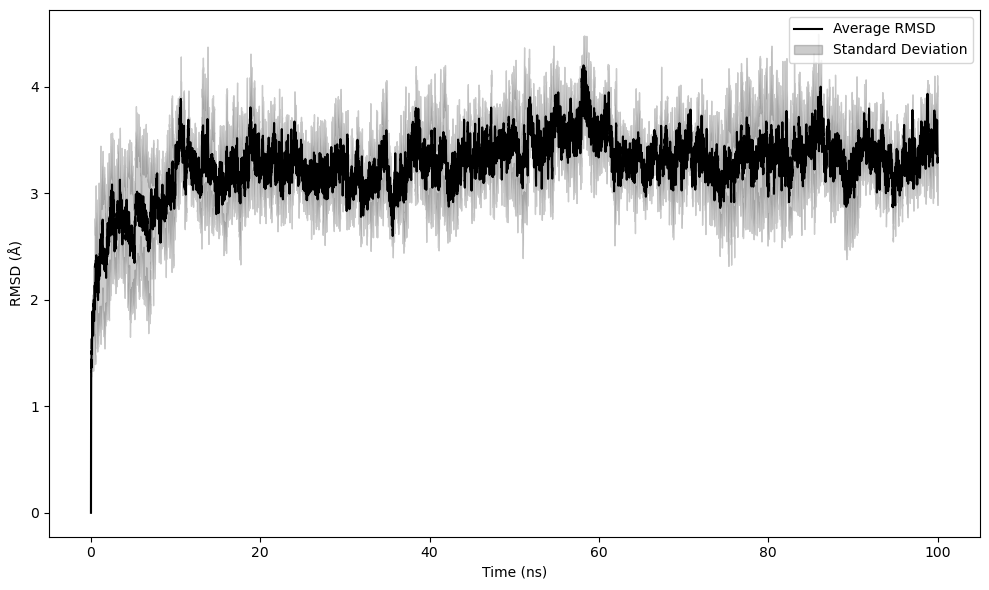

In [24]:
rmsd_values1 = rmsd_analysis1.rmsd[:, 2]
rmsd_values2 = rmsd_analysis2.rmsd[:, 2]
rmsd_values3 = rmsd_analysis3.rmsd[:, 2]

time = rmsd_analysis1.rmsd[:, 1]/1000  # Assuming the time is stored in the third column
# Calculate the average RMSD
average_rmsd = (rmsd_values1 + rmsd_values2 + rmsd_values3) / 3

# Calculate the standard deviation
std_deviation = np.std([rmsd_values1, rmsd_values2, rmsd_values3], axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, average_rmsd, label='Average RMSD', color='black')
plt.fill_between(time, average_rmsd - std_deviation, average_rmsd + std_deviation, alpha=0.2, label='Standard Deviation', color='black')
plt.xlabel('Time (ns)')
plt.ylabel('RMSD (Å)')
plt.legend()
plt.tight_layout()
plt.show()